In [1]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy,
                           Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation

Our problem formulation is as following:
TO THINK

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(0)

# Build a user-defined scenario and policy:
reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                    'ID flood wave shape': 4, 'planning steps': 2}
reference_values.update({'discount rate {}'.format(n): 3.5 for n in planning_steps})
scen1 = {}

for key in dike_model.uncertainties:
    name_split = key.name.split('_')

    if len(name_split) == 1:
        scen1.update({key.name: reference_values[key.name]})

    else:
        scen1.update({key.name: reference_values[name_split[1]]})

ref_scenario = Scenario('reference', **scen1)

# no dike increase, no warning, none of the rfr
zero_policy = {'DaysToThreat': 0}
zero_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
zero_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
pol0 = {}

for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol0.update({key.name: zero_policy[s2]})

policy0 = Policy('Policy 0', **pol0)

# Call random scenarios or policies:
#    n_scenarios = 5
#    scenarios = sample_uncertainties(dike_model, 50)
#    n_policies = 10

# single run
#    start = time.time()
#    dike_model.run_model(ref_scenario, policy0)
#    end = time.time()
#    print(end - start)
#    results = dike_model.outcomes_output




[MainProcess/INFO] performing 1 scenarios * 5 policies * 1 model(s) = 5 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] experiments finished


In [8]:
planning_steps #this is hardcoded in dike_model_function, not sure what they mean?
# Planning steps are just running the model multiple times!!!! Adaptive planning blabla
#The model's planning window is 200/3 = 66 years
#THe planning steps are the 0, 1 and 2 after all the levers. 

array([0, 1, 2])

In [ ]:
# series run
experiments, outcomes = perform_experiments(dike_model, ref_scenario, 5)

In [16]:
experiments[["A.1_DikeIncrease 0", "A.1_DikeIncrease 1", "A.1_DikeIncrease 2", "4_RfR 1"]]

,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,4_RfR 1
0,6.0,3.0,0.0,0.0
1,8.0,4.0,6.0,1.0
2,9.0,0.0,3.0,0.0
3,1.0,6.0,6.0,1.0
4,3.0,10.0,9.0,0.0


In [12]:
experiments.columns

Index(['discount rate 0', 'discount rate 1', 'discount rate 2',
       'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate',
       'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail',
       'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax',
       'A.5_pfail', 'A.5_Brate', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [5]:
outcomes

{'All Costs': array([1.32508410e+09, 1.90861731e+09, 1.69824981e+09, 2.23883925e+09,
        1.65763392e+09]),
 'Expected Number of Deaths': array([0.00662986, 0.        , 0.        , 0.00779925, 0.00483359])}

In [7]:
for key in dike_model.levers:
    print(key)

0_RfR 0
0_RfR 1
0_RfR 2
1_RfR 0
1_RfR 1
1_RfR 2
2_RfR 0
2_RfR 1
2_RfR 2
3_RfR 0
3_RfR 1
3_RfR 2
4_RfR 0
4_RfR 1
4_RfR 2
EWS_DaysToThreat
A.1_DikeIncrease 0
A.1_DikeIncrease 1
A.1_DikeIncrease 2
A.2_DikeIncrease 0
A.2_DikeIncrease 1
A.2_DikeIncrease 2
A.3_DikeIncrease 0
A.3_DikeIncrease 1
A.3_DikeIncrease 2
A.4_DikeIncrease 0
A.4_DikeIncrease 1
A.4_DikeIncrease 2
A.5_DikeIncrease 0
A.5_DikeIncrease 1
A.5_DikeIncrease 2


So the A's correspond to the following (Gorssel is A4, and only Deventer is upstream)

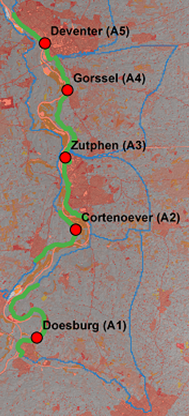

The RfR correspond to

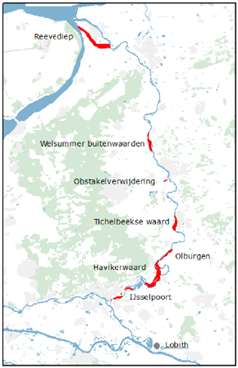

locationsss??

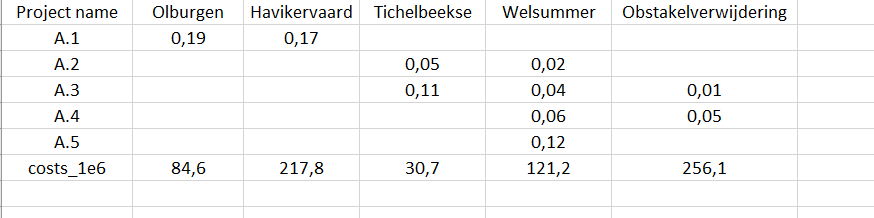

In [ ]:
nfe = 50000
epsilons = [0.05] * #n of robustness metrics
n_scenarios = 50

#what do we want?
robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, 
                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, 
                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]

# convergence : function or collection of functions, optional
#convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 3]), EpsilonProgress()]
#alternatively:
convergence = [HyperVolume.from_outcomes(dike_model.outcomes), EpsilonProgress()]

#OVERKIIIIIIIIIIIIL
# results, convergence = evaluator.robust_optimize(robustnes_functions, n_scenarios, nfe=nfe, convergence=convergence, epsilons=epsilons)
results, convergence = evaluator.optimize(nfe=nfe, epsilons=epsilon, convergence=convergence)

**Hypervolume**

This metric is derived from a hyper-volume measure, which describes the
    multi-dimensional volume of space contained within the pareto front. When
    computed with minimum and maximums, it describes the ratio of dominated
    outcomes to all possible outcomes in the extent of the space.  Getting this
    number to be high or low is not necessarily important, as not all outcomes
    within the min-max range will be feasible.  But, having the hypervolume remain
    fairly stable over multiple generations of the evolutionary algorithm provides
    an indicator of convergence.